<a href="https://colab.research.google.com/github/anandathllh/Portofolio/blob/main/Multi_label_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [ ]:
pd.set_option('display.max_columns', None)

## **Load Dataset**

**Membaca file lowongan_kerja.csv**

In [ ]:
lowongan_kerja = pd.read_csv("/content/drive/MyDrive/Tim 2D Final Project Drive/Dataset/dataset-6/linkedIn_posting/lowongan_kerja.csv")
lowongan_kerja.head()

,id_pekerjaan,id_perusahaan,judul,deskripsi,gaji_maksimal,gaji_tengah,gaji_minimal,periode_pembayaran,jenis_pekerjaan_terformat,lokasi,lamaran,diperbolehkan_jarak_jauh,tampilan,url_posting_pekerjaan,url_pendaftaran,tipe_pendaftaran,tingkat_pengalaman_terformat,deskripsi_keterampilan,domain_penyelenggaraan,disponsori,jenis_pekerjaan,mata_uang,tipe_kompensasi,waktu_kedaluwarsa,waktu_daftar
0,3757940104,553718.0,Hearing Care Provider,Overview\n\nHearingLife is a national hearing ...,NaN,5250.00,NaN,MONTHLY,Full-time,"Little River, SC",NaN,NaN,9.0,https://www.linkedin.com/jobs/view/3757940104/...,https://careers-demant.icims.com/jobs/19601/he...,OffsiteApply,Entry level,NaN,careers-demant.icims.com,0,FULL_TIME,USD,BASE_SALARY,2023-12-04 08:53:20,2023-11-04 09:26:40
1,3757940025,2192142.0,Shipping & Receiving Associate 2nd shift (Beav...,Metalcraft of Mayville\nMetalcraft of Mayville...,NaN,NaN,NaN,NaN,Full-time,"Beaver Dam, WI",NaN,NaN,NaN,https://www.linkedin.com/jobs/view/3757940025/...,https://www.click2apply.net/mXLQz5S5NEYEXsKjwH...,OffsiteApply,NaN,NaN,www.click2apply.net,0,FULL_TIME,NaN,NaN,2023-12-04 08:53:20,2023-11-04 06:40:00
2,3757938019,474443.0,"Manager, Engineering",\nThe TSUBAKI name is synonymous with excellen...,NaN,NaN,NaN,NaN,Full-time,"Bessemer, AL",NaN,NaN,NaN,https://www.linkedin.com/jobs/view/3757938019/...,https://www.click2apply.net/LwbOykH2yAJdahB5Ah...,OffsiteApply,NaN,Bachelor's Degree in Mechanical Engineering pr...,www.click2apply.net,0,FULL_TIME,NaN,NaN,2023-12-04 08:53:20,2023-11-04 06:40:00
3,3757938018,18213359.0,Cook,descriptionTitle\n\n Looking for a great oppor...,NaN,22.27,NaN,HOURLY,Full-time,"Aliso Viejo, CA",NaN,NaN,1.0,https://www.linkedin.com/jobs/view/3757938018/...,https://jobs.apploi.com/view/854782?utm_campai...,OffsiteApply,Entry level,NaN,jobs.apploi.com,0,FULL_TIME,USD,BASE_SALARY,2023-12-04 08:53:20,2023-11-04 06:40:00
4,3757937095,437225.0,Principal Cloud Security Architect (Remote),"Job Summary\nAt iHerb, we are on a mission to ...",275834.0,NaN,205956.0,YEARLY,Full-time,United States,NaN,1.0,NaN,https://www.linkedin.com/jobs/view/3757937095/...,https://careers.iherb.com/global/en/job/IHINGL...,OffsiteApply,Mid-Senior level,NaN,careers.iherb.com,0,FULL_TIME,USD,BASE_SALARY,2023-12-04 08:53:20,2023-11-04 09:26:40


In [ ]:
skill_pekerjaan = pd.read_csv("/content/drive/MyDrive/Tim 2D Final Project Drive/Dataset/dataset-6/linkedIn_posting/detail_pekerjaan/skill_pekerjaan.csv")
skill_pekerjaan.head()

,id_pekerjaan,singkatan_kemampuan
0,3690843087,ACCT
1,3690843087,FIN
2,3691763971,MGMT
3,3691763971,MNFC
4,3691775263,MGMT


**Hanya mengambil kolom yang penting dari lowongan_kerja.csv**

In [ ]:
df = pd.merge(lowongan_kerja, skill_pekerjaan, on='id_pekerjaan', how='left')

In [ ]:
df1 = lowongan_kerja[["id_pekerjaan", "judul", "deskripsi"]]
print(df1.shape)
df1.head()

(33246, 3)


,id_pekerjaan,judul,deskripsi
0,3757940104,Hearing Care Provider,Overview\n\nHearingLife is a national hearing ...
1,3757940025,Shipping & Receiving Associate 2nd shift (Beav...,Metalcraft of Mayville\nMetalcraft of Mayville...
2,3757938019,"Manager, Engineering",\nThe TSUBAKI name is synonymous with excellen...
3,3757938018,Cook,descriptionTitle\n\n Looking for a great oppor...
4,3757937095,Principal Cloud Security Architect (Remote),"Job Summary\nAt iHerb, we are on a mission to ..."


In [ ]:
df1.isna().sum()

id_pekerjaan    0
judul           0
deskripsi       1
dtype: int64

In [ ]:
df1.dropna(inplace=True)
df1.isna().sum()

<ipython-input-121-3f770feb9149>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.dropna(inplace=True)


id_pekerjaan    0
judul           0
deskripsi       0
dtype: int64

**Menggabungkan kolom judul dan deskripsi menjadi kolom text**

In [ ]:
df1['text'] = df1.apply(lambda row: str(row['judul']) + ' ' + str(row['deskripsi']), axis=1)
print(df1.shape)
df1.head()

<ipython-input-122-805c52c05834>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['text'] = df1.apply(lambda row: str(row['judul']) + ' ' + str(row['deskripsi']), axis=1)


(33245, 4)


,id_pekerjaan,judul,deskripsi,text
0,3757940104,Hearing Care Provider,Overview\n\nHearingLife is a national hearing ...,Hearing Care Provider Overview\n\nHearingLife ...
1,3757940025,Shipping & Receiving Associate 2nd shift (Beav...,Metalcraft of Mayville\nMetalcraft of Mayville...,Shipping & Receiving Associate 2nd shift (Beav...
2,3757938019,"Manager, Engineering",\nThe TSUBAKI name is synonymous with excellen...,"Manager, Engineering \nThe TSUBAKI name is syn..."
3,3757938018,Cook,descriptionTitle\n\n Looking for a great oppor...,Cook descriptionTitle\n\n Looking for a great ...
4,3757937095,Principal Cloud Security Architect (Remote),"Job Summary\nAt iHerb, we are on a mission to ...",Principal Cloud Security Architect (Remote) Jo...


In [ ]:
df1 = df1[["id_pekerjaan", "text"]]
print(df1.shape)
df1.head()

(33245, 2)


,id_pekerjaan,text
0,3757940104,Hearing Care Provider Overview\n\nHearingLife ...
1,3757940025,Shipping & Receiving Associate 2nd shift (Beav...
2,3757938019,"Manager, Engineering \nThe TSUBAKI name is syn..."
3,3757938018,Cook descriptionTitle\n\n Looking for a great ...
4,3757937095,Principal Cloud Security Architect (Remote) Jo...


**Membaca file skill_pekerjaan.csv**

In [ ]:
skill_pekerjaan.isna().sum()

id_pekerjaan           0
singkatan_kemampuan    0
dtype: int64

In [ ]:
print(f"jumlah keunikan skill pekerjaan : {skill_pekerjaan['singkatan_kemampuan'].nunique()}")
skill_pekerjaan["singkatan_kemampuan"].value_counts()

jumlah keunikan skill pekerjaan : 35


singkatan_kemampuan
IT      7406
SALE    5651
MGMT    5082
MNFC    4585
ENG     3947
HCPR    3820
BD      3809
OTHR    3026
FIN     2468
ACCT    1636
MRKT    1597
ADM     1270
PRJM    1228
ANLS     952
CUST     865
HR       824
RSCH     807
DSGN     728
LGL      670
EDU      630
ART      597
CNSL     541
QA       495
GENB     458
WRT      453
PR       452
TRNG     444
STRA     367
SUPL     359
PRDM     344
ADVR     342
PROD     217
SCI      216
PRCH     196
DIST     109
Name: count, dtype: int64

**Membaca file kemampuan.csv**

In [ ]:
kemampuan = pd.read_csv("/content/drive/MyDrive/Tim 2D Final Project Drive/Dataset/dataset-6/linkedIn_posting/mapping/kemampuan.csv")
print(kemampuan.shape)
kemampuan.head(35)

(35, 2)


,singkatan_kemampuan,nama_kemampuan
0,PRCH,Purchasing
1,SUPL,Supply Chain
2,PR,Public Relations
3,SCI,Science
4,STRA,Strategy/Planning
5,WRT,Writing/Editing
6,QA,Quality Assurance
7,DIST,Distribution
8,PROD,Production
9,PRJM,Project Management


In [ ]:
kemampuan.isna().sum()

singkatan_kemampuan    0
nama_kemampuan         0
dtype: int64

In [ ]:
print(f"jumlah keunikan : {kemampuan['nama_kemampuan'].nunique()}")
kemampuan["nama_kemampuan"].unique()

jumlah keunikan : 35


array(['Purchasing', 'Supply Chain', 'Public Relations', 'Science',
       'Strategy/Planning', 'Writing/Editing', 'Quality Assurance',
       'Distribution', 'Production', 'Project Management', 'Advertising',
       'Research', 'Human Resources', 'Legal', 'Product Management',
       'Marketing', 'Education', 'Training', 'Analyst', 'Finance',
       'Sales', 'Business Development', 'Management', 'Manufacturing',
       'General Business', 'Customer Service', 'Engineering', 'Other',
       'Consulting', 'Accounting/Auditing', 'Health Care Provider',
       'Design', 'Art/Creative', 'Information Technology',
       'Administrative'], dtype=object)

In [ ]:
kemampuan["nama_kemampuan"] = kemampuan["nama_kemampuan"].str.lower().str.replace(' ', '_')
kemampuan["nama_kemampuan"].unique()

array(['purchasing', 'supply_chain', 'public_relations', 'science',
       'strategy/planning', 'writing/editing', 'quality_assurance',
       'distribution', 'production', 'project_management', 'advertising',
       'research', 'human_resources', 'legal', 'product_management',
       'marketing', 'education', 'training', 'analyst', 'finance',
       'sales', 'business_development', 'management', 'manufacturing',
       'general_business', 'customer_service', 'engineering', 'other',
       'consulting', 'accounting/auditing', 'health_care_provider',
       'design', 'art/creative', 'information_technology',
       'administrative'], dtype=object)

In [ ]:
df2 = pd.merge(skill_pekerjaan, kemampuan, on="singkatan_kemampuan", how="left")
print(df2.shape)
df2.head()

(56591, 3)


,id_pekerjaan,singkatan_kemampuan,nama_kemampuan
0,3690843087,ACCT,accounting/auditing
1,3690843087,FIN,finance
2,3691763971,MGMT,management
3,3691763971,MNFC,manufacturing
4,3691775263,MGMT,management


In [ ]:
df2.isna().sum()

id_pekerjaan           0
singkatan_kemampuan    0
nama_kemampuan         0
dtype: int64

In [ ]:
skill_mapping = {
    'ADM' : ['ADM', 'CNSL', 'HR', 'LGL', 'MGMT', 'PRJM'],
    'FIN' : ['FIN', 'ACCT', 'CUST', 'DIST', 'PRCH', 'SALE', 'STRA', 'SUPL', 'BD', 'GENB'],
    'DSGN' : ['DSGN', 'WRT', 'ART'],
    'EDU' : ['EDU', 'TRNG'],
    'ENG' : ['ENG', 'IT', 'MNFC'],
    'HCPR' : ['HCPR'],
    'MRKT' : ['ADVR', 'MRKT', 'PR'],
    'PRDM' : ['PRDM'],
    'RSCH' : ['RSCH', 'ANLS', 'SCI', 'QA'],
    'PROD' : ['PROD']
}

In [ ]:
semua_skill = set(df2['singkatan_kemampuan'].dropna().unique())
skill_dalam_mapping = set()
for daftar_skill in skill_mapping.values():
    skill_dalam_mapping.update(daftar_skill)

skill_belum_dimapping = semua_skill - skill_dalam_mapping

print(skill_belum_dimapping)
len(skill_belum_dimapping)

{'OTHR'}


1

In [ ]:
semua_skill = set(df2['singkatan_kemampuan'].dropna().unique())

skill_dalam_mapping = set()
for daftar_skill in skill_mapping.values():
    skill_dalam_mapping.update(daftar_skill)

skill_tidak_ada_di_df = skill_dalam_mapping - semua_skill

print(skill_tidak_ada_di_df)
len(skill_tidak_ada_di_df)

set()


0

In [ ]:
total_rows = df2.shape[0]
duplicated = df2['id_pekerjaan'].duplicated().sum()

print(f"total rows skill pekerjaan : {total_rows}")
print(f"total duplikasi id_pekerjaan : {duplicated}")
print(f"data seharusnya : {total_rows - duplicated}")

total rows skill pekerjaan : 56591
total duplikasi id_pekerjaan : 24169
data seharusnya : 32422


In [ ]:
df2_group = df2.groupby('id_pekerjaan')['nama_kemampuan'].apply(lambda x: '|'.join(x)).reset_index()
print(df2_group.shape)
df2_group.head()

(32422, 2)


,id_pekerjaan,nama_kemampuan
0,3958427,design|art/creative|information_technology
1,85008768,sales|business_development
2,102339515,business_development|sales
3,108965123,administrative
4,133114754,sales|business_development


In [ ]:
df3 = pd.merge(df1, df2_group, on="id_pekerjaan", how="inner")
print(df3.shape)
df3.head()

(32033, 3)


,id_pekerjaan,text,nama_kemampuan
0,3757940104,Hearing Care Provider Overview\n\nHearingLife ...,other
1,3757940025,Shipping & Receiving Associate 2nd shift (Beav...,management|manufacturing
2,3757938019,"Manager, Engineering \nThe TSUBAKI name is syn...",engineering
3,3757938018,Cook descriptionTitle\n\n Looking for a great ...,management|manufacturing
4,3757937095,Principal Cloud Security Architect (Remote) Jo...,information_technology


In [ ]:
def clean_text(text):
    # hapus link
    text = re.sub(r'http\S+|www\S+|https\S+', ' ', text, flags=re.MULTILINE)

    # Hapus karakter non-ASCII
    text = re.sub(r'[^\x00-\x7F]+', ' ', text)

    #hapus yang spasinya lebih dari 1
    text = re.sub(r'\s+', ' ', text).strip()
    return text

In [ ]:
df3['text_clean'] = df3["text"].apply(clean_text)

In [ ]:
df3.head()

,id_pekerjaan,text,nama_kemampuan,text_clean
0,3757940104,Hearing Care Provider Overview\n\nHearingLife ...,other,Hearing Care Provider Overview HearingLife is ...
1,3757940025,Shipping & Receiving Associate 2nd shift (Beav...,management|manufacturing,Shipping & Receiving Associate 2nd shift (Beav...
2,3757938019,"Manager, Engineering \nThe TSUBAKI name is syn...",engineering,"Manager, Engineering The TSUBAKI name is synon..."
3,3757938018,Cook descriptionTitle\n\n Looking for a great ...,management|manufacturing,Cook descriptionTitle Looking for a great oppo...
4,3757937095,Principal Cloud Security Architect (Remote) Jo...,information_technology,Principal Cloud Security Architect (Remote) Jo...


In [ ]:
lowongan_kerja[lowongan_kerja['lamaran'] < 20]

,id_pekerjaan,id_perusahaan,judul,deskripsi,gaji_maksimal,gaji_tengah,gaji_minimal,periode_pembayaran,jenis_pekerjaan_terformat,lokasi,lamaran,diperbolehkan_jarak_jauh,tampilan,url_posting_pekerjaan,url_pendaftaran,tipe_pendaftaran,tingkat_pengalaman_terformat,deskripsi_keterampilan,domain_penyelenggaraan,disponsori,jenis_pekerjaan,mata_uang,tipe_kompensasi,waktu_kedaluwarsa,waktu_daftar
9,3757936026,634806.0,Instrumentation Quality Control Representative...,Instrumentation Quality Control Representative...,NaN,NaN,NaN,NaN,Contract,United States,12.0,1.0,59.0,https://www.linkedin.com/jobs/view/3757936026/...,NaN,SimpleOnsiteApply,Entry level,NaN,jobs.stsigroup.com,0,CONTRACT,NaN,NaN,2024-01-03 08:20:00,2023-11-04 20:33:20
22,3757934539,2192142.0,Vice President of Supply Chain,Metalcraft of Mayville\nMetalcraft of Mayville...,NaN,NaN,NaN,NaN,Full-time,"Mayville, WI",8.0,NaN,60.0,https://www.linkedin.com/jobs/view/3757934539/...,https://www.click2apply.net/PLrkoOCAqa17JtM1ec...,OffsiteApply,NaN,NaN,www.click2apply.net,0,FULL_TIME,NaN,NaN,2023-12-04 08:53:20,2023-11-04 06:40:00
27,3757934319,18391435.0,Controls Engineer,Head-huntress.com has a Direct Hire opportunit...,150000.0,NaN,121000.0,YEARLY,Full-time,"Orlando, FL",1.0,NaN,5.0,https://www.linkedin.com/jobs/view/3757934319/...,https://recruit.zoho.com/recruit/ViewJob.na?di...,OffsiteApply,Mid-Senior level,NaN,recruit.zoho.com,0,FULL_TIME,USD,BASE_SALARY,2023-12-04 06:06:40,2023-11-04 06:40:00
31,3757934287,91313799.0,Lead Electrical Engineer [5326],We're seeking a Lead Electrical Engineer to jo...,NaN,NaN,NaN,NaN,Full-time,"Florence, KY",1.0,NaN,2.0,https://www.linkedin.com/jobs/view/3757934287/...,NaN,ComplexOnsiteApply,Mid-Senior level,NaN,NaN,0,FULL_TIME,NaN,NaN,2023-12-04 06:06:40,2023-11-04 06:40:00
32,3757934282,91313799.0,Lead Systems Engineer [5321],About Us:We are a premier organization at the ...,NaN,NaN,NaN,NaN,Full-time,"Florence, KY",1.0,NaN,8.0,https://www.linkedin.com/jobs/view/3757934282/...,NaN,ComplexOnsiteApply,Mid-Senior level,NaN,NaN,0,FULL_TIME,NaN,NaN,2023-12-04 06:06:40,2023-11-04 06:40:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33230,1418582485,NaN,Commercial Property Manager/Senior Property Ma...,Join Our Growing Property Management Team!\nLo...,NaN,NaN,NaN,NaN,Full-time,"Las Vegas, NV",10.0,NaN,37.0,https://www.linkedin.com/jobs/view/1418582485/...,NaN,ComplexOnsiteApply,NaN,NaN,NaN,0,FULL_TIME,NaN,NaN,2024-02-18 21:00:00,2023-08-22 21:33:20
33236,903408693,3894635.0,Office Associate,Provide clerical and administrative support to...,42000.0,NaN,37000.0,YEARLY,Full-time,"Albany, GA",5.0,NaN,49.0,https://www.linkedin.com/jobs/view/903408693/?...,NaN,ComplexOnsiteApply,NaN,NaN,NaN,1,FULL_TIME,USD,BASE_SALARY,2024-02-18 18:13:20,2023-08-22 18:46:40
33239,218881389,NaN,Accounting Associate,My client a local office is seeking an Account...,NaN,NaN,NaN,NaN,Full-time,"Bolingbrook, IL",1.0,NaN,2.0,https://www.linkedin.com/jobs/view/218881389/?...,NaN,ComplexOnsiteApply,NaN,NaN,NaN,0,FULL_TIME,NaN,NaN,2023-12-03 21:46:40,2023-11-03 22:20:00
33240,133196985,1089558.0,Model Risk Auditor,Join Us as a Model Risk Auditor – Showcase You...,NaN,NaN,NaN,NaN,Contract,"New York, NY",1.0,NaN,17.0,https://www.linkedin.com/jobs/view/133196985/?...,NaN,ComplexOnsiteApply,NaN,NaN,NaN,0,CONTRACT,NaN,NaN,2023-09-21 18:13:20,2023-08-22 18:46:40


In [ ]:
df3.shape

(32033, 4)

In [ ]:
text_skill = df3.drop(columns=['text'])
text_skill.drop_duplicates(subset="text_clean", inplace=True)
text_skill.shape

(29305, 3)

In [ ]:
text_skill.head()

,id_pekerjaan,nama_kemampuan,text_clean
0,3757940104,other,Hearing Care Provider Overview HearingLife is ...
1,3757940025,management|manufacturing,Shipping & Receiving Associate 2nd shift (Beav...
2,3757938019,engineering,"Manager, Engineering The TSUBAKI name is synon..."
3,3757938018,management|manufacturing,Cook descriptionTitle Looking for a great oppo...
4,3757937095,information_technology,Principal Cloud Security Architect (Remote) Jo...


In [ ]:
text_skill.to_csv('/content/drive/MyDrive/Tim 2D Final Project Drive/Dataset/dataset6_preprocess/text_skill3.csv', index=False)

# Exploratory Data Analysis

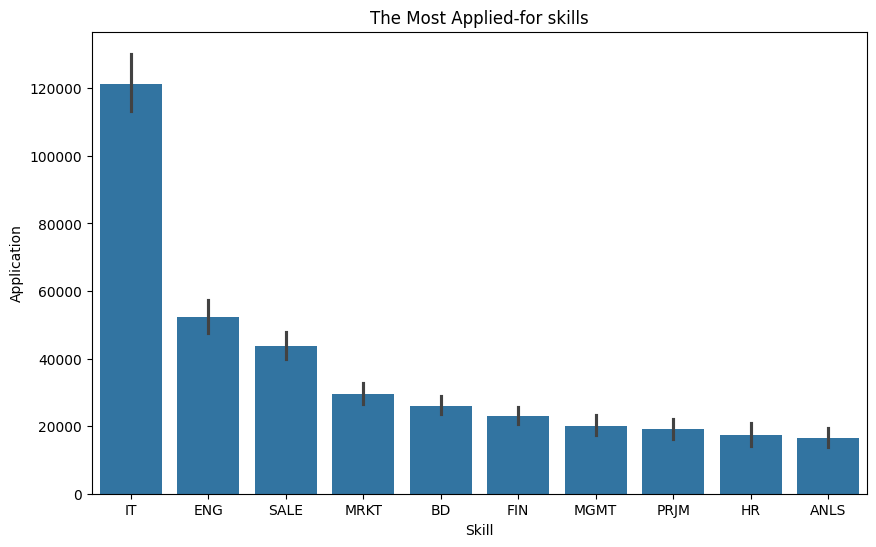

In [ ]:
skill_application = df.groupby('singkatan_kemampuan')['lamaran'].sum().sort_values(ascending=False).index[:10]

plt.figure(figsize=(10, 6))
sns.barplot(data=df, y='lamaran', x='singkatan_kemampuan', estimator='sum', order=skill_application)
plt.title('The Most Applied-for skills')
plt.xlabel('Skill')
plt.ylabel('Application')
plt.show()

In [ ]:
skill_application

singkatan_kemampuan
IT      121192.0
ENG      52286.0
SALE     43667.0
MRKT     29501.0
BD       25972.0
FIN      22967.0
MGMT     19944.0
PRJM     19073.0
HR       17307.0
ANLS     16498.0
Name: lamaran, dtype: float64

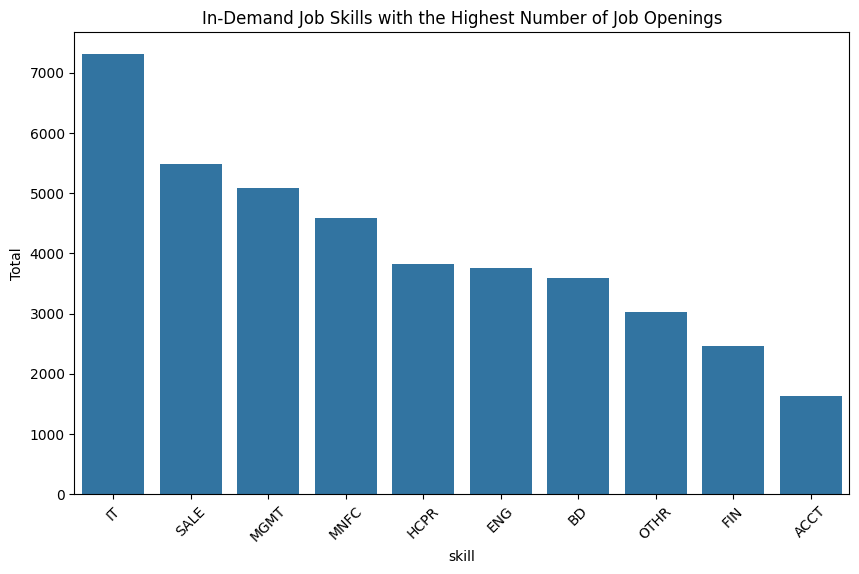

In [ ]:
skills_counts = df['singkatan_kemampuan'].value_counts()
top_10_skill = skills_counts.nlargest(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_skill.index, y=top_10_skill.values, order=top_10_skill.index)
plt.xlabel('skill')
plt.ylabel('Total')
plt.title('In-Demand Job Skills with the Highest Number of Job Openings')
plt.xticks(rotation=45)
plt.show()

In [ ]:
top_10_skill

singkatan_kemampuan
IT      7307
SALE    5480
MGMT    5082
MNFC    4585
HCPR    3820
ENG     3764
BD      3588
OTHR    3026
FIN     2468
ACCT    1636
Name: count, dtype: int64

# MODELLING

In [ ]:
import os
import pandas as pd
import numpy as np
import shutil
import sys
import tqdm.notebook as tq
from collections import defaultdict

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

import torch
import torch.nn as nn
from transformers import DistilBertTokenizer, RobertaTokenizer, BertTokenizer, BertModel, DistilBertModel, RobertaModel
from transformers import AdamW

device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
device

device(type='cuda')

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/dataset/text_skill3.csv")
print(df.shape)
df.head()

(29305, 3)


,id_pekerjaan,nama_kemampuan,text_clean
0,3757940104,other,Hearing Care Provider Overview HearingLife is ...
1,3757940025,management|manufacturing,Shipping & Receiving Associate 2nd shift (Beav...
2,3757938019,engineering,"Manager, Engineering The TSUBAKI name is synon..."
3,3757938018,management|manufacturing,Cook descriptionTitle Looking for a great oppo...
4,3757937095,information_technology,Principal Cloud Security Architect (Remote) Jo...


In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
df['nama_kemampuan'] = df['nama_kemampuan'].str.split('|')

one_hot = mlb.fit_transform(df['nama_kemampuan'])
one_hot_df = pd.DataFrame(one_hot, columns=mlb.classes_)

df = df.drop(columns=['nama_kemampuan', 'id_pekerjaan'])
df = pd.concat([df, one_hot_df], axis=1)

df.head()

,text_clean,accounting/auditing,administrative,advertising,analyst,art/creative,business_development,consulting,customer_service,design,distribution,education,engineering,finance,general_business,health_care_provider,human_resources,information_technology,legal,management,manufacturing,marketing,other,product_management,production,project_management,public_relations,purchasing,quality_assurance,research,sales,science,strategy/planning,supply_chain,training,writing/editing
0,Hearing Care Provider Overview HearingLife is ...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Shipping & Receiving Associate 2nd shift (Beav...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,"Manager, Engineering The TSUBAKI name is synon...",0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Cook descriptionTitle Looking for a great oppo...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Principal Cloud Security Architect (Remote) Jo...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_train, df_temp = train_test_split(df, random_state=77, test_size=0.3, shuffle=True)
df_test, df_valid = train_test_split(df_temp, random_state=88, test_size=0.5, shuffle=True)

In [ ]:
print(f"Train: {df_train.shape}, Test: {df_test.shape}, Valid: {df_valid.shape}")

Train: (20513, 36), Test: (4396, 36), Valid: (4396, 36)


In [ ]:
MAX_LEN = 256
TRAIN_BATCH_SIZE = 32
VALID_BATCH_SIZE = 32
TEST_BATCH_SIZE = 32
EPOCHS = 5
LEARNING_RATE = 1e-05
THRESHOLD = 0.3

In [ ]:
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

In [ ]:
test_text = "testing DistilBERT tokenizer."
encodings = tokenizer.encode_plus(test_text,
                                  add_special_tokens = True,
                                  max_length = 50,
                                  truncation = True,
                                  padding = "max_length",
                                  return_attention_mask = True,
                                  return_tensors = "pt")
encodings

{'input_ids': tensor([[  101,  5604,  4487, 16643, 23373, 19204, 17629,  1012,   102,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0]])}

In [ ]:
target = list(df.columns)
target_list = target[1:]
target_list

['accounting/auditing',
 'administrative',
 'advertising',
 'analyst',
 'art/creative',
 'business_development',
 'consulting',
 'customer_service',
 'design',
 'distribution',
 'education',
 'engineering',
 'finance',
 'general_business',
 'health_care_provider',
 'human_resources',
 'information_technology',
 'legal',
 'management',
 'manufacturing',
 'marketing',
 'other',
 'product_management',
 'production',
 'project_management',
 'public_relations',
 'purchasing',
 'quality_assurance',
 'research',
 'sales',
 'science',
 'strategy/planning',
 'supply_chain',
 'training',
 'writing/editing']

In [ ]:
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, df, tokenizer, max_len, target_list):
        self.tokenizer = tokenizer
        self.df = df
        self.title = list(df['text_clean'])
        self.targets = self.df[target_list].values
        self.max_len = max_len

    def __len__(self):
        return len(self.title)

    def __getitem__(self, index):
        title = str(self.title[index])
        title = " ".join(title.split())
        inputs = self.tokenizer.encode_plus(
            title,
            None,
            add_special_tokens=True,
            max_length=self.max_len,
            padding='max_length',
            return_token_type_ids=True,
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt'
        )
        return {
            'input_ids': inputs['input_ids'].flatten(),
            'attention_mask': inputs['attention_mask'].flatten(),
            'token_type_ids': inputs["token_type_ids"].flatten(),
            'targets': torch.FloatTensor(self.targets[index]),
            'title': title
        }

In [ ]:
train_dataset = CustomDataset(df_train, tokenizer, MAX_LEN, target_list)
valid_dataset = CustomDataset(df_valid, tokenizer, MAX_LEN, target_list)
test_dataset = CustomDataset(df_test, tokenizer, MAX_LEN, target_list)

In [ ]:
next(iter(train_dataset))

{'input_ids': tensor([  101,  3902,  8043,  3105,  6412,  3693,  1037,  3045,  2136,   999,
          3902,  8043,  2023,  3475,  1056,  2074,  2115,  2279,  3105,  2009,
          1055,  2115,  4495,  2000,  2022,  2112,  1997,  2019,  6429,  2136,
          2008, 18058,  2006,  2256,  4872,  2000,  3113,  1998, 13467,  2256,
          4113,  1055,  3325,  1996,  2617,  2027,  3328,  2083,  2256,  4303,
           999,  2057,  3749, 14336,  3454,  2005,  3930,  1998,  2476, 12607,
          1998,  5136,  2256,  5126,  2000,  2022,  2256,  4602, 11412,  1012,
          2054,  2057,  3749,  2017,  4895, 28689,  6216,  3709,  2731,  1998,
          2458,  3454, 12382,  7904, 19575,  2015,  2006,  7759,  1010,  7027,
          1010,  9778,  2015,  1998,  9275, 12379, 20283,  3674,  5770,  3488,
          2000,  4848,  2115,  3791,  3825,  2051,  2125,  2030,  3825,  5305,
          2681,  1006,  2241,  2006,  3295,  1007,  6695,  2005, 12607,  2451,
          6951,  6695,  2007,  2455,  2

In [ ]:
train_data_loader = torch.utils.data.DataLoader(train_dataset,
    batch_size=TRAIN_BATCH_SIZE,
    shuffle=True,
    num_workers=0
)

val_data_loader = torch.utils.data.DataLoader(valid_dataset,
    batch_size=VALID_BATCH_SIZE,
    shuffle=False,
    num_workers=0
)

test_data_loader = torch.utils.data.DataLoader(test_dataset,
    batch_size=TEST_BATCH_SIZE,
    shuffle=False,
    num_workers=0
)

In [ ]:
next_batch = next(iter(train_data_loader))
print(next_batch['input_ids'].shape)
print(next_batch['attention_mask'].shape)
print(next_batch['token_type_ids'].shape)
print(next_batch['targets'].shape)

torch.Size([32, 256])
torch.Size([32, 256])
torch.Size([32, 256])
torch.Size([32, 35])


## DistillBERT

In [ ]:
class DistilBERTClass(nn.Module):
    def __init__(self):
        super(DistilBERTClass, self).__init__()
        self.distil_bert_model = DistilBertModel.from_pretrained('distilbert-base-uncased', return_dict=True)
        self.dropout = nn.Dropout(0.3)
        self.linear = nn.Linear(768, 35)

    def forward(self, input_ids, attn_mask):
        output = self.distil_bert_model(
            input_ids,
            attention_mask=attn_mask
        )
        output_dropout = self.dropout(output.last_hidden_state[:, 0])  # Use the CLS token output
        output = self.linear(output_dropout)
        return output

model = DistilBERTClass()

# # Freezing BERT layers: (tested, weaker convergence)
# for param in model.distil_bert_model.parameters():
#     param.requires_grad = False

model.to(device)

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

DistilBERTClass(
  (distil_bert_model): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): MultiHeadSelfAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)
            (l

In [ ]:
def loss_fn(outputs, targets):
    return torch.nn.BCEWithLogitsLoss()(outputs, targets)

In [ ]:
optimizer = AdamW(model.parameters(), lr = 1e-5)

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:588: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [ ]:
def train_model(training_loader, model, optimizer):
    losses = []
    correct_predictions = 0
    num_samples = 0
    model.train()
    loop = tq.tqdm(enumerate(training_loader), total=len(training_loader),
                      leave=True, colour='steelblue')
    for batch_idx, data in loop:
        ids = data['input_ids'].to(device, dtype=torch.long)
        mask = data['attention_mask'].to(device, dtype=torch.long)
        targets = data['targets'].to(device, dtype=torch.float)
        outputs = model(ids, mask)
        loss = loss_fn(outputs, targets)
        losses.append(loss.item())
        outputs = torch.sigmoid(outputs).cpu().detach().numpy().round()
        targets = targets.cpu().detach().numpy()
        correct_predictions += np.sum(outputs == targets)
        num_samples += targets.size

        optimizer.zero_grad()
        loss.backward()
        nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimizer.step()

    return model, float(correct_predictions) / num_samples, np.mean(losses)

In [ ]:
def eval_model(validation_loader, model, optimizer):
    losses = []
    correct_predictions = 0
    num_samples = 0
    model.eval()

    with torch.no_grad():
        for batch_idx, data in enumerate(validation_loader, 0):
            ids = data['input_ids'].to(device, dtype=torch.long)
            mask = data['attention_mask'].to(device, dtype=torch.long)
            targets = data['targets'].to(device, dtype=torch.float)
            outputs = model(ids, mask)

            loss = loss_fn(outputs, targets)
            losses.append(loss.item())

            outputs = torch.sigmoid(outputs).cpu().detach().numpy().round()
            targets = targets.cpu().detach().numpy()
            correct_predictions += np.sum(outputs == targets)
            num_samples += targets.size

    return float(correct_predictions) / num_samples, np.mean(losses)


In [ ]:
data_dir = "/content/train/distilbert"
output_dir = os.path.join(data_dir, "output")

if not os.path.exists(output_dir):
    os.makedirs(output_dir)

In [ ]:
history = defaultdict(list)
best_accuracy = 0

for epoch in range(1, EPOCHS + 1):
    print(f'Epoch {epoch}/{EPOCHS}')
    model, train_acc, train_loss = train_model(train_data_loader, model, optimizer)
    val_acc, val_loss = eval_model(val_data_loader, model, optimizer)

    print(f'train_loss={train_loss:.4f}, val_loss={val_loss:.4f} train_acc={train_acc:.4f}, val_acc={val_acc:.4f}')

    history['train_acc'].append(train_acc)
    history['train_loss'].append(train_loss)
    history['val_acc'].append(val_acc)
    history['val_loss'].append(val_loss)
    if val_acc > best_accuracy:
        torch.save(model.state_dict(), os.path.join(data_dir, "output", "MLTC_model_state.bin"))
        best_accuracy = val_acc

Epoch 1/5


  0%|          | 0/642 [00:00<?, ?it/s]

train_loss=0.2102, val_loss=0.1407 train_acc=0.9469, val_acc=0.9624
Epoch 2/5


  0%|          | 0/642 [00:00<?, ?it/s]

train_loss=0.1253, val_loss=0.1080 train_acc=0.9648, val_acc=0.9689
Epoch 3/5


  0%|          | 0/642 [00:00<?, ?it/s]

train_loss=0.1009, val_loss=0.0941 train_acc=0.9705, val_acc=0.9716
Epoch 4/5


  0%|          | 0/642 [00:00<?, ?it/s]

train_loss=0.0883, val_loss=0.0883 train_acc=0.9739, val_acc=0.9729
Epoch 5/5


  0%|          | 0/642 [00:00<?, ?it/s]

train_loss=0.0801, val_loss=0.0846 train_acc=0.9761, val_acc=0.9737


In [ ]:
print(history)

defaultdict(<class 'list'>, {'train_acc': [0.9469145002124089, 0.9647749510763209, 0.970484222548767, 0.9738521216510784, 0.9761127090137961], 'train_loss': [0.2102229755104888, 0.1253346153810574, 0.10092818702214232, 0.08828982193533598, 0.08009159685666688], 'val_acc': [0.9623553880150787, 0.9688613024827766, 0.9715585597296243, 0.9729104380605745, 0.9736578707916288], 'val_loss': [0.14072292395260022, 0.10798209468307703, 0.09406135528199915, 0.0882538895028225, 0.08459282609755578]})


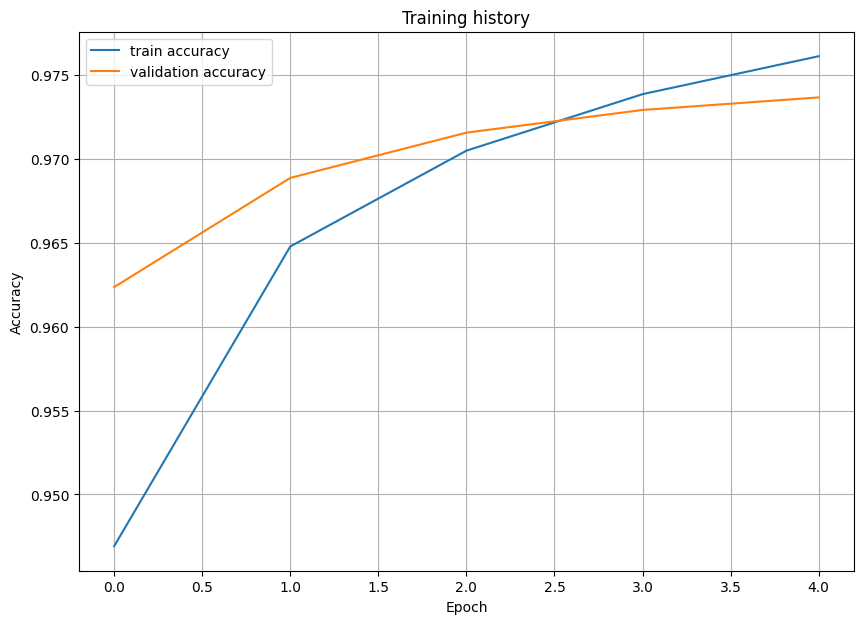

In [ ]:
plt.rcParams["figure.figsize"] = (10,7)
plt.plot(history['train_acc'], label='train accuracy')
plt.plot(history['val_acc'], label='validation accuracy')
plt.title('Training history')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.grid()

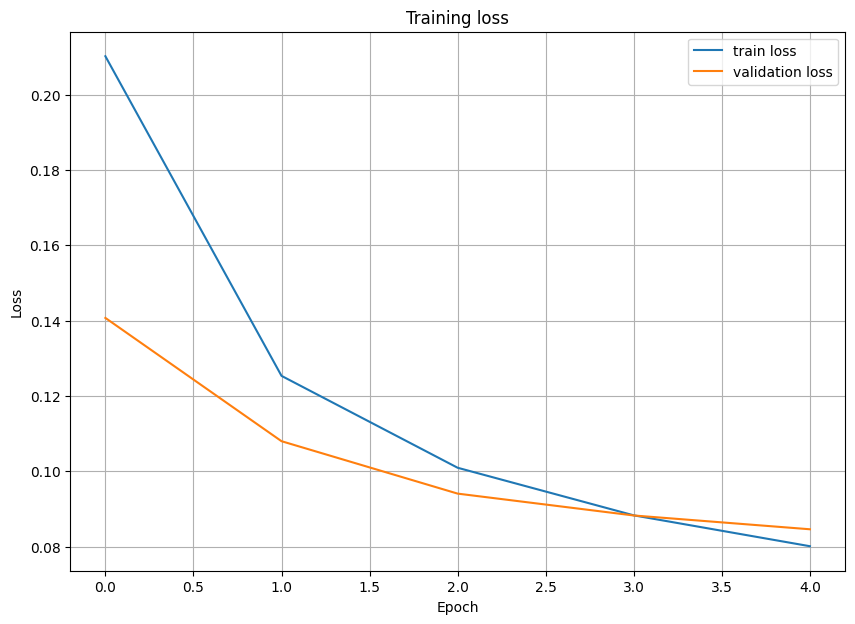

In [ ]:
plt.rcParams["figure.figsize"] = (10,7)
plt.plot(history['train_loss'], label='train loss')
plt.plot(history['val_loss'], label='validation loss')
plt.title('Training loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.grid()

In [ ]:
torch.save(model.state_dict(), os.path.join(data_dir,"output","MLTC_model_state.bin"))

In [ ]:
model = DistilBERTClass()
model.load_state_dict(torch.load(os.path.join(data_dir,"output","MLTC_model_state.bin")))
model = model.to(device)

You are using a model of type distilbert to instantiate a model of type bert. This is not supported for all configurations of models and can yield errors.
Some weights of BertModel were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['embeddings.LayerNorm.bias', 'embeddings.LayerNorm.weight', 'embeddings.position_embeddings.weight', 'embeddings.token_type_embeddings.weight', 'embeddings.word_embeddings.weight', 'encoder.layer.0.attention.output.LayerNorm.bias', 'encoder.layer.0.attention.output.LayerNorm.weight', 'encoder.layer.0.attention.output.dense.bias', 'encoder.layer.0.attention.output.dense.weight', 'encoder.layer.0.attention.self.key.bias', 'encoder.layer.0.attention.self.key.weight', 'encoder.layer.0.attention.self.query.bias', 'encoder.layer.0.attention.self.query.weight', 'encoder.layer.0.attention.self.value.bias', 'encoder.layer.0.attention.self.value.weight', 'encoder.layer.0.intermediate.dense.bias', 'encoder.layer.0.inte

In [ ]:
test_acc, test_loss = eval_model(test_data_loader, model, optimizer)

In [ ]:
test_acc

0.9632913037826596

In [ ]:
test_loss

0.11616838723421097

In [ ]:
def get_predictions(model, data_loader):
    """
    Outputs:
      predictions -
    """
    model = model.eval()

    titles = []
    predictions = []
    prediction_probs = []
    target_values = []

    with torch.no_grad():
      for data in data_loader:
        title = data["title"]
        ids = data["input_ids"].to(device, dtype = torch.long)
        mask = data["attention_mask"].to(device, dtype = torch.long)
        token_type_ids = data['token_type_ids'].to(device, dtype = torch.long)
        targets = data["targets"].to(device, dtype = torch.float)

        outputs = model(ids, mask, token_type_ids)
        # add sigmoid, for the training sigmoid is in BCEWithLogitsLoss
        outputs = torch.sigmoid(outputs).detach().cpu()
        # thresholding at 0.5
        preds = outputs.round()
        targets = targets.detach().cpu()

        titles.extend(title)
        predictions.extend(preds)
        prediction_probs.extend(outputs)
        target_values.extend(targets)

    predictions = torch.stack(predictions)
    prediction_probs = torch.stack(prediction_probs)
    target_values = torch.stack(target_values)

    return titles, predictions, prediction_probs, target_values

In [ ]:
titles, predictions, prediction_probs, target_values = get_predictions(model, test_data_loader)

In [ ]:
predictions.numpy()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
print(f"titles:{len(titles)} \npredictions:{predictions.shape} \nprediction_probs:{prediction_probs.shape} \ntarget_values:{target_values.shape}")

titles:4396 
predictions:torch.Size([4396, 35]) 
prediction_probs:torch.Size([4396, 35]) 
target_values:torch.Size([4396, 35])


In [ ]:
predictions[0]

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
prediction_probs[0]

tensor([0.0117, 0.0141, 0.0027, 0.0146, 0.0139, 0.0156, 0.0198, 0.0101, 0.0295,
        0.0039, 0.0064, 0.5833, 0.0138, 0.0078, 0.0133, 0.0067, 0.5487, 0.0079,
        0.1918, 0.2555, 0.0060, 0.0459, 0.0051, 0.0108, 0.0386, 0.0034, 0.0066,
        0.0360, 0.0143, 0.0170, 0.0080, 0.0085, 0.0111, 0.0069, 0.0043])

In [ ]:
target_values[0]

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
df_train.head()

,text_clean,accounting/auditing,administrative,advertising,analyst,art/creative,business_development,consulting,customer_service,design,distribution,education,engineering,finance,general_business,health_care_provider,human_resources,information_technology,legal,management,manufacturing,marketing,other,product_management,production,project_management,public_relations,purchasing,quality_assurance,research,sales,science,strategy/planning,supply_chain,training,writing/editing
26846,Busser Job Description JOIN A WINNING TEAM! BU...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
27868,Social Media Coordinator About Target Eagle:Ta...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
14400,Marketing Intern Marketing Intern NJI is a wil...,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4501,Product Designer Product Designer HELP US MAKE...,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12306,Fraud Investigator Lead Why Work at Bremer? Ar...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_train['text_clean'].iloc[0]

'Busser Job Description JOIN A WINNING TEAM! BUSSER This isn t just your next job it s your opportunity to be part of an amazing team that delivers on our promise to meet and exceed our guest s experience the moment they walk through our doors! We offer structured programs for growth and career advancement and consider our employees to be our greatest asset. What We Offer You Unparalleled training and development programs Generous employee discounts on dining, retail, amusements and hotels Flexible schedules Multiple benefit plans to suit your needs Paid time off or paid sick leave (based on location) Opportunities for advancement Community volunteer opportunities with Landry s League Positive and respectful work environment where diversity is valued Apply now if you: Aspire to our Be FAIR ideals: Be Friendly, Accommodating, Inclusive and Respectful Are a Team Player with a guest first attitude Have a passion for great food and great fun Are comfortable working in fast-paced environmen

In [ ]:
raw_text = df_train['text_clean'].iloc[0]

encoded_text = tokenizer.encode_plus(
    raw_text,
    max_length=MAX_LEN,
    add_special_tokens=True,
    return_token_type_ids=True,
    pad_to_max_length=True,
    return_attention_mask=True,
    return_tensors='pt',
)


input_ids = encoded_text['input_ids'].to(device)
attention_mask = encoded_text['attention_mask'].to(device)
token_type_ids = encoded_text['token_type_ids'].to(device)
output = model(input_ids, attention_mask, token_type_ids)
output = torch.sigmoid(output).detach().cpu()
output = output.flatten().round().numpy()
output



array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0.], dtype=float32)

In [ ]:
predicted_indices = np.where(output == 1)[0]
predicted_labels = [target_list[idx] for idx in predicted_indices]

print("Predicted labels:", predicted_labels)

Predicted labels: ['management', 'manufacturing']


## BERT

In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [ ]:
train_dataset = CustomDataset(df_train, tokenizer, MAX_LEN, target_list)
valid_dataset = CustomDataset(df_valid, tokenizer, MAX_LEN, target_list)
test_dataset = CustomDataset(df_test, tokenizer, MAX_LEN, target_list)

In [ ]:
train_data_loader = torch.utils.data.DataLoader(train_dataset,
    batch_size=TRAIN_BATCH_SIZE,
    shuffle=True,
    num_workers=0
)

val_data_loader = torch.utils.data.DataLoader(valid_dataset,
    batch_size=VALID_BATCH_SIZE,
    shuffle=False,
    num_workers=0
)

test_data_loader = torch.utils.data.DataLoader(test_dataset,
    batch_size=TEST_BATCH_SIZE,
    shuffle=False,
    num_workers=0
)

In [ ]:
class BERTClass(torch.nn.Module):
    def __init__(self):
        super(BERTClass, self).__init__()
        self.bert_model = BertModel.from_pretrained('bert-base-uncased', return_dict=True)
        self.dropout = torch.nn.Dropout(0.3)
        self.linear = torch.nn.Linear(768, 35)

    def forward(self, input_ids, attn_mask, token_type_ids):
        output = self.bert_model(
            input_ids,
            attention_mask=attn_mask,
            token_type_ids=token_type_ids
        )
        output_dropout = self.dropout(output.pooler_output)
        output = self.linear(output_dropout)
        return output

model = BERTClass()

# # Freezing BERT layers: (tested, weaker convergence)
# for param in model.bert_model.parameters():
#     param.requires_grad = False

model.to(device)

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

BERTClass(
  (bert_model): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwi

In [ ]:
def loss_fn(outputs, targets):
    return torch.nn.BCEWithLogitsLoss()(outputs, targets)

In [ ]:
optimizer = AdamW(model.parameters(), lr = 1e-5)

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:588: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [ ]:
def train_model(training_loader, model, optimizer):

    losses = []
    correct_predictions = 0
    num_samples = 0
    model.train()
    loop = tq.tqdm(enumerate(training_loader), total=len(training_loader),
                      leave=True, colour='steelblue')
    for batch_idx, data in loop:
        ids = data['input_ids'].to(device, dtype = torch.long)
        mask = data['attention_mask'].to(device, dtype = torch.long)
        token_type_ids = data['token_type_ids'].to(device, dtype = torch.long)
        targets = data['targets'].to(device, dtype = torch.float)

        outputs = model(ids, mask, token_type_ids)
        loss = loss_fn(outputs, targets)
        losses.append(loss.item())
        outputs = torch.sigmoid(outputs).cpu().detach().numpy().round()
        targets = targets.cpu().detach().numpy()
        correct_predictions += np.sum(outputs==targets)
        num_samples += targets.size

        optimizer.zero_grad()
        loss.backward()
        nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimizer.step()

    return model, float(correct_predictions)/num_samples, np.mean(losses)

In [ ]:
def eval_model(validation_loader, model, optimizer):
    losses = []
    correct_predictions = 0
    num_samples = 0
    model.eval()

    with torch.no_grad():
        for batch_idx, data in enumerate(validation_loader, 0):
            ids = data['input_ids'].to(device, dtype = torch.long)
            mask = data['attention_mask'].to(device, dtype = torch.long)
            token_type_ids = data['token_type_ids'].to(device, dtype = torch.long)
            targets = data['targets'].to(device, dtype = torch.float)
            outputs = model(ids, mask, token_type_ids)

            loss = loss_fn(outputs, targets)
            losses.append(loss.item())

            outputs = torch.sigmoid(outputs).cpu().detach().numpy().round()
            targets = targets.cpu().detach().numpy()
            correct_predictions += np.sum(outputs==targets)
            num_samples += targets.size

    return float(correct_predictions)/num_samples, np.mean(losses)

In [ ]:
data_dir = "/content/train/bert"
output_dir = os.path.join(data_dir, "output")

if not os.path.exists(output_dir):
    os.makedirs(output_dir)

In [ ]:
history = defaultdict(list)
best_accuracy = 0


for epoch in range(1, EPOCHS+1):
    print(f'Epoch {epoch}/{EPOCHS}')
    model, train_acc, train_loss = train_model(train_data_loader, model, optimizer)
    val_acc, val_loss = eval_model(val_data_loader, model, optimizer)

    print(f'train_loss={train_loss:.4f}, val_loss={val_loss:.4f} train_acc={train_acc:.4f}, val_acc={val_acc:.4f}')

    history['train_acc'].append(train_acc)
    history['train_loss'].append(train_loss)
    history['val_acc'].append(val_acc)
    history['val_loss'].append(val_loss)

    if val_acc > best_accuracy:
        torch.save(model.state_dict(), os.path.join(data_dir,"output","MLTC_model_state.bin"))
        best_accuracy = val_acc

Epoch 1/5


  0%|          | 0/642 [00:00<?, ?it/s]

train_loss=0.2363, val_loss=0.1590 train_acc=0.9386, val_acc=0.9507
Epoch 2/5


  0%|          | 0/642 [00:00<?, ?it/s]

train_loss=0.1400, val_loss=0.1197 train_acc=0.9574, val_acc=0.9657
Epoch 3/5


  0%|          | 0/642 [00:00<?, ?it/s]

train_loss=0.1111, val_loss=0.1019 train_acc=0.9665, val_acc=0.9685
Epoch 4/5


  0%|          | 0/642 [00:00<?, ?it/s]

train_loss=0.0951, val_loss=0.0927 train_acc=0.9707, val_acc=0.9712
Epoch 5/5


  0%|          | 0/642 [00:00<?, ?it/s]

train_loss=0.0843, val_loss=0.0878 train_acc=0.9748, val_acc=0.9733


In [ ]:
print(history)

defaultdict(<class 'list'>, {'train_acc': [0.9386089657429784, 0.9573928728123628, 0.9664797933018086, 0.9707418988655278, 0.9748145775153039], 'train_loss': [0.2362696940421687, 0.14003679972733848, 0.1111390882772263, 0.09513512644278484, 0.08431123479376794], 'val_acc': [0.9507019368256857, 0.9657350838424542, 0.9684583387495126, 0.9712010919017289, 0.9733004029637332], 'val_loss': [0.1589924460951833, 0.11971485425812611, 0.10189254360570424, 0.09266342838173328, 0.0877935078157031]})


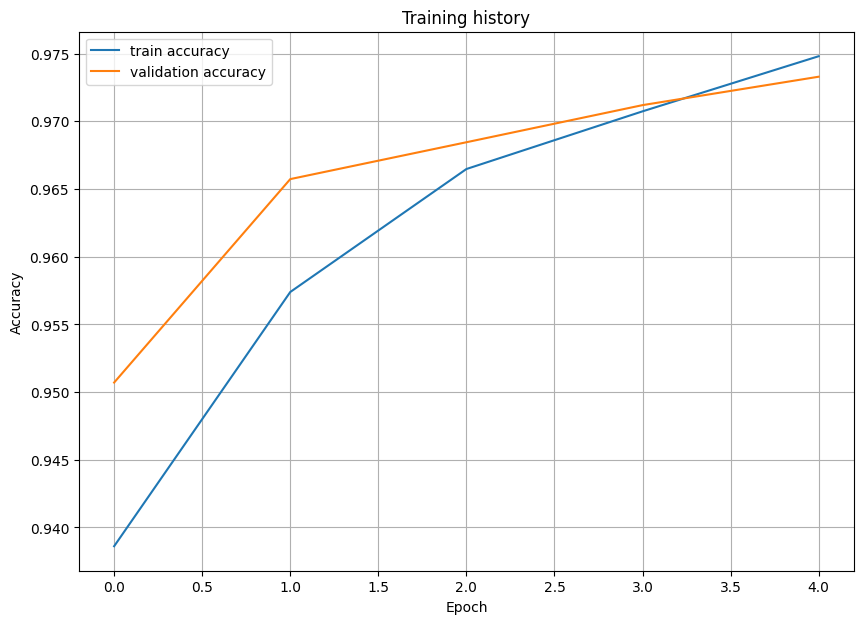

In [ ]:
plt.rcParams["figure.figsize"] = (10,7)
plt.plot(history['train_acc'], label='train accuracy')
plt.plot(history['val_acc'], label='validation accuracy')
plt.title('Training history')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.grid()

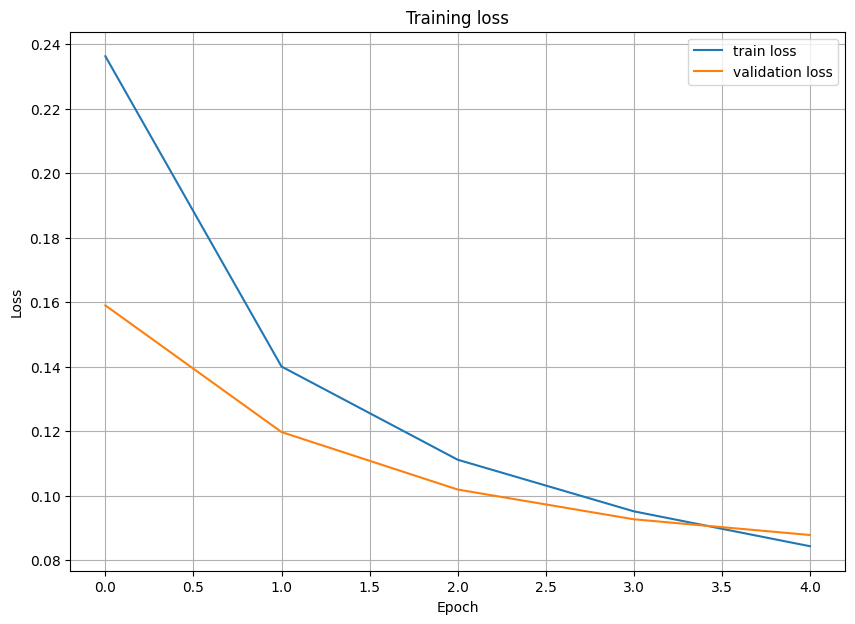

In [ ]:
plt.rcParams["figure.figsize"] = (10,7)
plt.plot(history['train_loss'], label='train loss')
plt.plot(history['val_loss'], label='validation loss')
plt.title('Training loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.grid()

In [ ]:
torch.save(model.state_dict(), os.path.join(data_dir,"output","MLTC_model_state.bin"))

In [ ]:
model = BERTClass()
model.load_state_dict(torch.load(os.path.join(data_dir,"output","MLTC_model_state.bin")))
model = model.to(device)

In [ ]:
test_acc, test_loss = eval_model(test_data_loader, model, optimizer)

In [ ]:
test_acc

0.9729624333809958

In [ ]:
test_loss

0.08881883552648882

In [ ]:
def get_predictions(model, data_loader):
    """
    Outputs:
      predictions -
    """
    model = model.eval()

    titles = []
    predictions = []
    prediction_probs = []
    target_values = []

    with torch.no_grad():
      for data in data_loader:
        title = data["title"]
        ids = data["input_ids"].to(device, dtype = torch.long)
        mask = data["attention_mask"].to(device, dtype = torch.long)
        token_type_ids = data['token_type_ids'].to(device, dtype = torch.long)
        targets = data["targets"].to(device, dtype = torch.float)

        outputs = model(ids, mask, token_type_ids)
        outputs = torch.sigmoid(outputs).detach().cpu()
        preds = outputs.round()
        targets = targets.detach().cpu()

        titles.extend(title)
        predictions.extend(preds)
        prediction_probs.extend(outputs)
        target_values.extend(targets)

    predictions = torch.stack(predictions)
    prediction_probs = torch.stack(prediction_probs)
    target_values = torch.stack(target_values)

    return titles, predictions, prediction_probs, target_values

In [ ]:
titles, predictions, prediction_probs, target_values = get_predictions(model, test_data_loader)

In [ ]:
predictions.numpy()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
print(f"titles:{len(titles)} \npredictions:{predictions.shape} \nprediction_probs:{prediction_probs.shape} \ntarget_values:{target_values.shape}")

titles:4396 
predictions:torch.Size([4396, 35]) 
prediction_probs:torch.Size([4396, 35]) 
target_values:torch.Size([4396, 35])


In [ ]:
predictions[0]

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
prediction_probs[0]

tensor([0.0085, 0.0078, 0.0028, 0.0141, 0.0059, 0.0104, 0.0115, 0.0089, 0.0098,
        0.0013, 0.0026, 0.1540, 0.0107, 0.0039, 0.0101, 0.0064, 0.8652, 0.0039,
        0.0136, 0.0100, 0.0042, 0.0413, 0.0043, 0.0030, 0.0221, 0.0018, 0.0011,
        0.0039, 0.0086, 0.0118, 0.0040, 0.0038, 0.0039, 0.0030, 0.0023])

In [ ]:
target_values[0]

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
df_test.iloc[100]

text_clean                Intensive Care Unit Registered Nurse Descripti...
accounting/auditing                                                       0
administrative                                                            0
advertising                                                               0
analyst                                                                   0
art/creative                                                              0
business_development                                                      0
consulting                                                                0
customer_service                                                          0
design                                                                    0
distribution                                                              0
education                                                                 0
engineering                                                               0
finance     

In [ ]:
df_test['text_clean'].iloc[100]

'Intensive Care Unit Registered Nurse Description Hourly Wage Estimate: $33.77 - $50.65 / hour Learn More About The Benefits Offered For This Job. The estimate displayed represents the typical wage range of candidates hired. Factors that may be used to determine your actual salary may include your specific skills, how many years of experience you have and comparison to other employees already in this role. The typical candidate is hired below midpoint of the range. Introduction Are you looking for a place to deliver excellent care patients deserve? At Sky Ridge Medical Center we support our colleagues in their positions. Join our Team as a(an) Intensive Care Unit Registered Nurse and access programs to assist with every stage of your career. Benefits Sky Ridge Medical Center, offers a total rewards package that supports the health, life, career and retirement of our colleagues. The available plans and programs include: Comprehensive medical coverage that covers many common services at 

In [ ]:
raw_text = df_test['text_clean'].iloc[100]

encoded_text = tokenizer.encode_plus(
    raw_text,
    max_length=MAX_LEN,
    add_special_tokens=True,
    return_token_type_ids=True,
    pad_to_max_length=True,
    return_attention_mask=True,
    return_tensors='pt',
)


input_ids = encoded_text['input_ids'].to(device)
attention_mask = encoded_text['attention_mask'].to(device)
token_type_ids = encoded_text['token_type_ids'].to(device)
output = model(input_ids, attention_mask, token_type_ids)
output = torch.sigmoid(output).detach().cpu()
output = output.flatten().round().numpy()
output



array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0.], dtype=float32)

In [ ]:
predicted_indices = np.where(output == 1)[0]
predicted_labels = [target_list[idx] for idx in predicted_indices]

print("Predicted labels:", predicted_labels)

Predicted labels: ['health_care_provider']


## RoBERTa

In [ ]:
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

In [ ]:
train_dataset = CustomDataset(df_train, tokenizer, MAX_LEN, target_list)
valid_dataset = CustomDataset(df_valid, tokenizer, MAX_LEN, target_list)
test_dataset = CustomDataset(df_test, tokenizer, MAX_LEN, target_list)

In [ ]:
train_data_loader = torch.utils.data.DataLoader(train_dataset,
    batch_size=TRAIN_BATCH_SIZE,
    shuffle=True,
    num_workers=0
)

val_data_loader = torch.utils.data.DataLoader(valid_dataset,
    batch_size=VALID_BATCH_SIZE,
    shuffle=False,
    num_workers=0
)

test_data_loader = torch.utils.data.DataLoader(test_dataset,
    batch_size=TEST_BATCH_SIZE,
    shuffle=False,
    num_workers=0
)

In [ ]:
class RoBERTaClass(torch.nn.Module):
    def __init__(self):
        super(RoBERTaClass, self).__init__()
        self.roberta_model = RobertaModel.from_pretrained('roberta-base', return_dict=True)
        self.dropout = torch.nn.Dropout(0.3)
        self.linear = torch.nn.Linear(768, 35)

    def forward(self, input_ids, attn_mask, token_type_ids):
        output = self.roberta_model(
            input_ids,
            attention_mask=attn_mask,
            token_type_ids=token_type_ids
        )
        output_dropout = self.dropout(output.pooler_output)
        output = self.linear(output_dropout)
        return output

model = RoBERTaClass()

# # Freezing BERT layers: (tested, weaker convergence)
# for param in model.roberta_model.parameters():
#     param.requires_grad = False

model.to(device)

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


RoBERTaClass(
  (roberta_model): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(50265, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0-11): 12 x RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): 

In [ ]:
def loss_fn(outputs, targets):
    return torch.nn.BCEWithLogitsLoss()(outputs, targets)

In [ ]:
optimizer = AdamW(model.parameters(), lr = 1e-5)

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:588: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [ ]:
def train_model(training_loader, model, optimizer):

    losses = []
    correct_predictions = 0
    num_samples = 0
    model.train()
    loop = tq.tqdm(enumerate(training_loader), total=len(training_loader),
                      leave=True, colour='steelblue')
    for batch_idx, data in loop:
        ids = data['input_ids'].to(device, dtype = torch.long)
        mask = data['attention_mask'].to(device, dtype = torch.long)
        token_type_ids = data['token_type_ids'].to(device, dtype = torch.long)
        targets = data['targets'].to(device, dtype = torch.float)

        outputs = model(ids, mask, token_type_ids)
        loss = loss_fn(outputs, targets)
        losses.append(loss.item())
        outputs = torch.sigmoid(outputs).cpu().detach().numpy().round()
        targets = targets.cpu().detach().numpy()
        correct_predictions += np.sum(outputs==targets)
        num_samples += targets.size

        optimizer.zero_grad()
        loss.backward()
        nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimizer.step()

    return model, float(correct_predictions)/num_samples, np.mean(losses)

In [ ]:
def eval_model(validation_loader, model, optimizer):
    losses = []
    correct_predictions = 0
    num_samples = 0
    model.eval()

    with torch.no_grad():
        for batch_idx, data in enumerate(validation_loader, 0):
            ids = data['input_ids'].to(device, dtype = torch.long)
            mask = data['attention_mask'].to(device, dtype = torch.long)
            token_type_ids = data['token_type_ids'].to(device, dtype = torch.long)
            targets = data['targets'].to(device, dtype = torch.float)
            outputs = model(ids, mask, token_type_ids)

            loss = loss_fn(outputs, targets)
            losses.append(loss.item())

            outputs = torch.sigmoid(outputs).cpu().detach().numpy().round()
            targets = targets.cpu().detach().numpy()
            correct_predictions += np.sum(outputs==targets)
            num_samples += targets.size

    return float(correct_predictions)/num_samples, np.mean(losses)

In [ ]:
data_dir = "/content/train/roberta"
output_dir = os.path.join(data_dir, "output")

if not os.path.exists(output_dir):
    os.makedirs(output_dir)

In [ ]:
history = defaultdict(list)
best_accuracy = 0


for epoch in range(1, EPOCHS+1):
    print(f'Epoch {epoch}/{EPOCHS}')
    model, train_acc, train_loss = train_model(train_data_loader, model, optimizer)
    val_acc, val_loss = eval_model(val_data_loader, model, optimizer)

    print(f'train_loss={train_loss:.4f}, val_loss={val_loss:.4f} train_acc={train_acc:.4f}, val_acc={val_acc:.4f}')

    history['train_acc'].append(train_acc)
    history['train_loss'].append(train_loss)
    history['val_acc'].append(val_acc)
    history['val_loss'].append(val_loss)

    if val_acc > best_accuracy:
        torch.save(model.state_dict(), os.path.join(data_dir,"output","MLTC_model_state.bin"))
        best_accuracy = val_acc

Epoch 1/5


  0%|          | 0/642 [00:00<?, ?it/s]

train_loss=0.2114, val_loss=0.1338 train_acc=0.9435, val_acc=0.9621
Epoch 2/5


  0%|          | 0/642 [00:00<?, ?it/s]

train_loss=0.1190, val_loss=0.1037 train_acc=0.9644, val_acc=0.9682
Epoch 3/5


  0%|          | 0/642 [00:00<?, ?it/s]

train_loss=0.0976, val_loss=0.0927 train_acc=0.9703, val_acc=0.9712
Epoch 4/5


  0%|          | 0/642 [00:00<?, ?it/s]

train_loss=0.0866, val_loss=0.0882 train_acc=0.9737, val_acc=0.9722
Epoch 5/5


  0%|          | 0/642 [00:00<?, ?it/s]

train_loss=0.0791, val_loss=0.0861 train_acc=0.9765, val_acc=0.9731


In [ ]:
print(history)

defaultdict(<class 'list'>, {'train_acc': [0.9435117799862108, 0.9644044543181676, 0.9702961884797794, 0.9737379083647304, 0.9764804200820386], 'train_loss': [0.21144094036143518, 0.11904506886673864, 0.09763213711271405, 0.08657511384908191, 0.07905682354492376], 'val_acc': [0.9621084102430781, 0.9682048615624593, 0.9712270895619394, 0.9721955024047836, 0.9730989210971013], 'val_loss': [0.1338306969922522, 0.10366216739234717, 0.09267948000975278, 0.0882437597906244, 0.08611351475659487]})


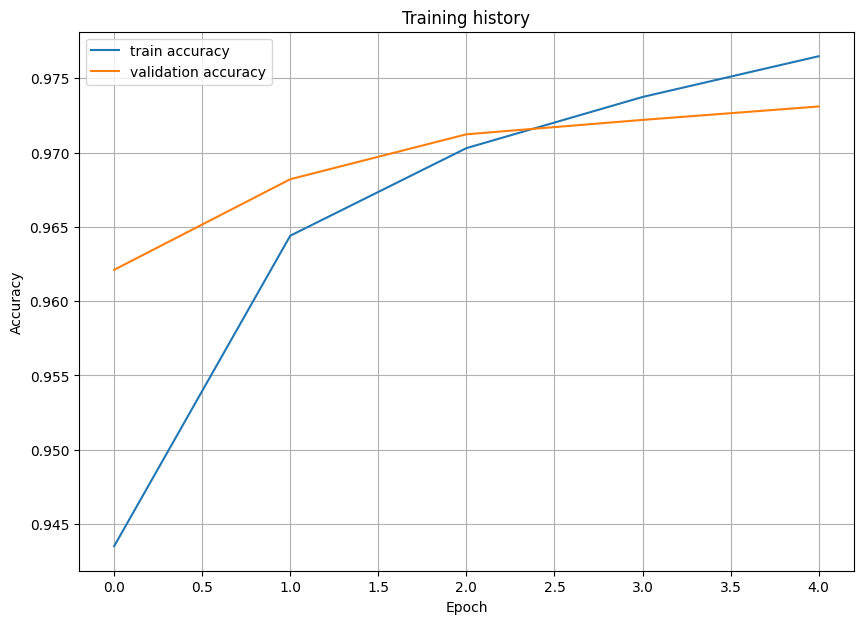

In [ ]:
plt.rcParams["figure.figsize"] = (10,7)
plt.plot(history['train_acc'], label='train accuracy')
plt.plot(history['val_acc'], label='validation accuracy')
plt.title('Training history')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.grid()

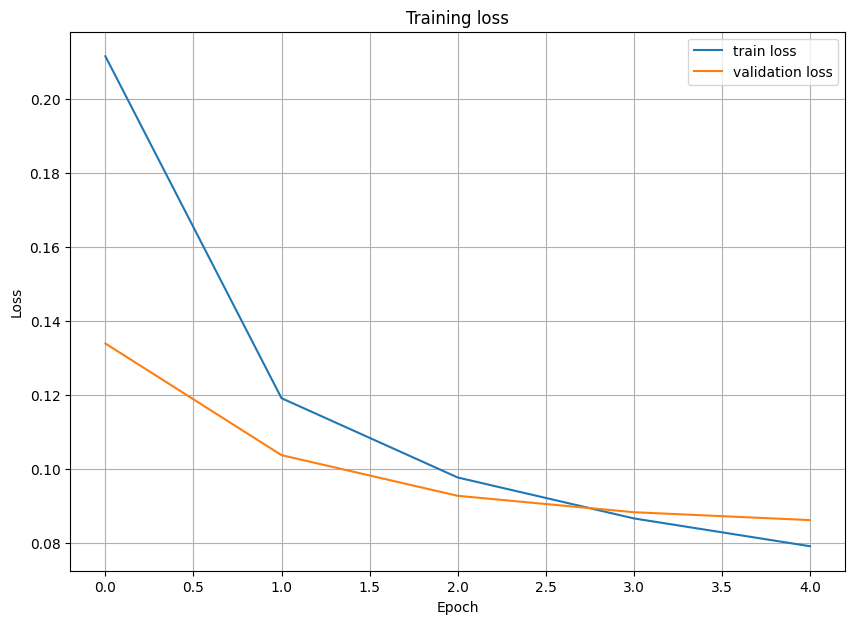

In [ ]:
plt.rcParams["figure.figsize"] = (10,7)
plt.plot(history['train_loss'], label='train loss')
plt.plot(history['val_loss'], label='validation loss')
plt.title('Training loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.grid()

In [ ]:
torch.save(model.state_dict(), os.path.join(data_dir,"output","MLTC_model_state.bin"))

In [ ]:
model = RoBERTaClass()
model.load_state_dict(torch.load(os.path.join(data_dir,"output","MLTC_model_state.bin")))
model = model.to(device)

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
test_acc, test_loss = eval_model(test_data_loader, model, optimizer)

In [ ]:
test_acc

0.9728584427401534

In [ ]:
test_loss

0.0866483699908291

In [ ]:
def get_predictions(model, data_loader):
    """
    Outputs:
      predictions -
    """
    model = model.eval()

    titles = []
    predictions = []
    prediction_probs = []
    target_values = []

    with torch.no_grad():
      for data in data_loader:
        title = data["title"]
        ids = data["input_ids"].to(device, dtype = torch.long)
        mask = data["attention_mask"].to(device, dtype = torch.long)
        token_type_ids = data['token_type_ids'].to(device, dtype = torch.long)
        targets = data["targets"].to(device, dtype = torch.float)

        outputs = model(ids, mask, token_type_ids)
        outputs = torch.sigmoid(outputs).detach().cpu()
        preds = outputs.round()
        targets = targets.detach().cpu()

        titles.extend(title)
        predictions.extend(preds)
        prediction_probs.extend(outputs)
        target_values.extend(targets)

    predictions = torch.stack(predictions)
    prediction_probs = torch.stack(prediction_probs)
    target_values = torch.stack(target_values)

    return titles, predictions, prediction_probs, target_values

In [ ]:
titles, predictions, prediction_probs, target_values = get_predictions(model, test_data_loader)

In [ ]:
predictions.numpy()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
print(f"titles:{len(titles)} \npredictions:{predictions.shape} \nprediction_probs:{prediction_probs.shape} \ntarget_values:{target_values.shape}")

titles:4396 
predictions:torch.Size([4396, 35]) 
prediction_probs:torch.Size([4396, 35]) 
target_values:torch.Size([4396, 35])


In [ ]:
predictions[0]

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
prediction_probs[0]

tensor([0.0049, 0.0080, 0.0017, 0.0093, 0.0056, 0.0083, 0.0095, 0.0066, 0.0093,
        0.0018, 0.0024, 0.1267, 0.0070, 0.0029, 0.0077, 0.0028, 0.9000, 0.0027,
        0.0125, 0.0110, 0.0052, 0.0279, 0.0033, 0.0038, 0.0189, 0.0033, 0.0020,
        0.0058, 0.0051, 0.0096, 0.0032, 0.0053, 0.0026, 0.0022, 0.0030])

In [ ]:
target_values[0]

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
df_test.iloc[100]

text_clean                Intensive Care Unit Registered Nurse Descripti...
accounting/auditing                                                       0
administrative                                                            0
advertising                                                               0
analyst                                                                   0
art/creative                                                              0
business_development                                                      0
consulting                                                                0
customer_service                                                          0
design                                                                    0
distribution                                                              0
education                                                                 0
engineering                                                               0
finance     

In [ ]:
df_test['text_clean'].iloc[100]

'Intensive Care Unit Registered Nurse Description Hourly Wage Estimate: $33.77 - $50.65 / hour Learn More About The Benefits Offered For This Job. The estimate displayed represents the typical wage range of candidates hired. Factors that may be used to determine your actual salary may include your specific skills, how many years of experience you have and comparison to other employees already in this role. The typical candidate is hired below midpoint of the range. Introduction Are you looking for a place to deliver excellent care patients deserve? At Sky Ridge Medical Center we support our colleagues in their positions. Join our Team as a(an) Intensive Care Unit Registered Nurse and access programs to assist with every stage of your career. Benefits Sky Ridge Medical Center, offers a total rewards package that supports the health, life, career and retirement of our colleagues. The available plans and programs include: Comprehensive medical coverage that covers many common services at 

In [ ]:
raw_text = df_test['text_clean'].iloc[100]

encoded_text = tokenizer.encode_plus(
    raw_text,
    max_length=MAX_LEN,
    add_special_tokens=True,
    return_token_type_ids=True,
    pad_to_max_length=True,
    return_attention_mask=True,
    return_tensors='pt',
)


input_ids = encoded_text['input_ids'].to(device)
attention_mask = encoded_text['attention_mask'].to(device)
token_type_ids = encoded_text['token_type_ids'].to(device)
output = model(input_ids, attention_mask, token_type_ids)
output = torch.sigmoid(output).detach().cpu()
output = output.flatten().round().numpy()
output



array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0.], dtype=float32)

In [ ]:
predicted_indices = np.where(output == 1)[0]
predicted_labels = [target_list[idx] for idx in predicted_indices]

print("Predicted labels:", predicted_labels)

Predicted labels: ['health_care_provider']


## LSTM

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Embedding, Bidirectional, LSTM, Dense


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Tim 2D Final Project Drive/Dataset/dataset6_preprocess/text_skill1.csv")
print(df.shape)
df.head()

(28913, 37)


,id_pekerjaan,accounting/auditing,administrative,advertising,analyst,art/creative,business_development,consulting,customer_service,design,...,purchasing,quality_assurance,research,sales,science,strategy/planning,supply_chain,training,writing/editing,text_clean
0,3757940104,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,hear care provider overview hearinglife nation...
1,3757940025,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ship receive associate shift beaver dam metalc...
2,3757938019,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,manager engineering tsubaki synonymous excelle...
3,3757938018,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,cook descriptiontitle look great opportunity d...
4,3757937095,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,principal cloud security architect remote job ...


In [ ]:
text = df['text_clean']
labels = df.drop(['id_pekerjaan', 'text_clean'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(text,
                                                    labels,
                                                    test_size=.1,
                                                    random_state=42)



In [ ]:
# Inisialisasi Tokenizer
# vocab_size = 15000
# max_length = 500
tokenizer = Tokenizer(oov_token='<oov>')

tokenizer.fit_on_texts(X_train)

X_train_sequences = tokenizer.texts_to_sequences(X_train)

In [ ]:
max_length_ = max([len(seq) for seq in X_train_sequences])
vocab_size_ = len(tokenizer.word_index)

print("Max sequence length:", max_length_)
print("Vocab Size:", vocab_size_)

Max sequence length: 1979
Vocab Size: 125481


In [ ]:
# Padding urutan token agar memiliki panjang yang sama
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_length_, padding='post')

In [ ]:
# Ubah teks uji menjadi urutan token
X_test_sequences = tokenizer.texts_to_sequences(X_test)

# Padding urutan token agar memiliki panjang yang sama seperti data latih
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_length_, padding='post')

In [ ]:
print(X_train_padded.shape)
print(X_test_padded.shape)

(23130, 1979)
(5783, 1979)


In [ ]:
num_classes = len(set(y_train))

# Inisialisasi model
model = keras.Sequential([
    layers.Embedding(input_dim=vocab_size_, output_dim=32),
    layers.layers.LSTM(16),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 32)          4015392   
                                                                 
 bidirectional (Bidirection  (None, 32)                6272      
 al)                                                             
                                                                 
 dense_2 (Dense)             (None, 64)                2112      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 35)                2275      
                                                                 
Total params: 4026051 (15.36 MB)
Trainable params: 4026051 (15.36 MB)
Non-trainable params: 0 (0.00 Byte)
______________

In [ ]:
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
# Definisi callback
class myCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('acc') is not None and logs.get('val_acc') is not None):
            if(logs.get('acc') > 0.95 and logs.get('val_acc') > 0.95):
                print("\nAccuracy > 95%")
                self.model.stop_training = True

callbacks = myCallback()

In [ ]:
hist = model.fit(X_train_padded, y_train,
                 epochs=50,
                 validation_data=(X_test_padded, y_test),
                 verbose=2,
                 callbacks=[callbacks])

In [ ]:
clean_text = df["text_clean"][0]

# Ubah teks menjadi urutan token
sequence = tokenizer.texts_to_sequences([clean_text])

# Padding urutan token jika diperlukan
padded_sequence = pad_sequences(sequence, maxlen=max_length_, padding='post')

# Lakukan prediksi
predicted_probabilities = model.predict(padded_sequence)

# Ambil indeks kelas dengan probabilitas tertinggi
predicted_label = predicted_probabilities.argmax(axis=-1)

# Konversi label ke kategori yang sesuai
predicted_category = predicted_label

print("Teks:", clean_text)
print("Prediksi Kategori:", predicted_category)

1/1 [==============================] - 0s 56ms/step
Teks: hear care provider overview hearinglife national hearing care company demant group global leader hear healthcare build heritage care health innovation hearinglife operate hear care center state follow scientific result orient approach hear healthcare provide highly skilled caring professional vision help people hear well life change hear health deliver good personalized care team member uphold hearinglife core value create trust team player apply attitude create innovative solution responsibility help people hear well provide clinical expertise diagnose treat hear loss ensure positive patient experience hearing care provider act accordance require industry state professional licensing standard local practice scope responsible grow maintain practice include achieve financial goal offer well class modern hear healthcare assessment treatment hearing care provider responsible create exceptional patient journey patient care appropria

In [ ]:
df.columns

Index(['id_pekerjaan', 'accounting/auditing', 'administrative', 'advertising',
       'analyst', 'art/creative', 'business_development', 'consulting',
       'customer_service', 'design', 'distribution', 'education',
       'engineering', 'finance', 'general_business', 'health_care_provider',
       'human_resources', 'information_technology', 'legal', 'management',
       'manufacturing', 'marketing', 'other', 'product_management',
       'production', 'project_management', 'public_relations', 'purchasing',
       'quality_assurance', 'research', 'sales', 'science',
       'strategy/planning', 'supply_chain', 'training', 'writing/editing',
       'text_clean'],
      dtype='object')

In [ ]:
X = df['text_clean']
Y = df.drop(['text_clean', 'id_pekerjaan'], axis=1)

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)
X_sequences = tokenizer.texts_to_sequences(X)

max_length = 1500
X_padded = pad_sequences(X_sequences, maxlen=max_length, padding='post')

X_train, X_test, Y_train, Y_test = train_test_split(X_padded, Y, test_size=0.2, random_state=12)

model = Sequential([
    Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=64, input_length=max_length),
    Bidirectional(LSTM(128)),
    Dense(Y.shape[1], activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

hist = model.fit(X_train, Y_train, epochs=100, batch_size=32, validation_data=(X_test, Y_test))


Epoch 1/100
723/723 [==============================] - 135s 182ms/step - loss: 0.1486 - accuracy: 0.2408 - val_loss: 0.1158 - val_accuracy: 0.2928
Epoch 2/100
723/723 [==============================] - 94s 130ms/step - loss: 0.0994 - accuracy: 0.4266 - val_loss: 0.1005 - val_accuracy: 0.4652
Epoch 3/100
723/723 [==============================] - 87s 120ms/step - loss: 0.0812 - accuracy: 0.4979 - val_loss: 0.0955 - val_accuracy: 0.4330
Epoch 4/100
723/723 [==============================] - 82s 113ms/step - loss: 0.0699 - accuracy: 0.5186 - val_loss: 0.0963 - val_accuracy: 0.4920
Epoch 5/100
723/723 [==============================] - 77s 106ms/step - loss: 0.0617 - accuracy: 0.5446 - val_loss: 0.0971 - val_accuracy: 0.4527
Epoch 6/100
723/723 [==============================] - 77s 106ms/step - loss: 0.0545 - accuracy: 0.5536 - val_loss: 0.1000 - val_accuracy: 0.4589
Epoch 7/100
723/723 [==============================] - 76s 105ms/step - loss: 0.0480 - accuracy: 0.5691 - val_loss: 0.1034 

In [ ]:
X = df['text_clean']
Y = df.drop(['text_clean', 'id_pekerjaan'], axis=1)

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)
X_sequences = tokenizer.texts_to_sequences(X)

from statistics import mean
average_length = mean([len(seq) for seq in X_sequences])

max_length = max([len(seq) for seq in X_sequences])
X_padded = pad_sequences(X_sequences, maxlen=max_length, padding='post')

X_train, X_test, Y_train, Y_test = train_test_split(X_padded, Y, test_size=0.2, random_state=42)

model = Sequential([
    Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=64, input_length=max_length),
    Bidirectional(LSTM(128)),
    Dense(Y.shape[1], activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

hist = model.fit(X_train, Y_train, epochs=100, batch_size=32, validation_data=(X_test, Y_test))


In [ ]:
pd.set_option('display.max_columns', None)
df.head()

,id_pekerjaan,accounting/auditing,administrative,advertising,analyst,art/creative,business_development,consulting,customer_service,design,distribution,education,engineering,finance,general_business,health_care_provider,human_resources,information_technology,legal,management,manufacturing,marketing,other,product_management,production,project_management,public_relations,purchasing,quality_assurance,research,sales,science,strategy/planning,supply_chain,training,writing/editing,text_clean
0,3757940104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,hear care provider overview hearinglife nation...
1,3757940025,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,ship receive associate shift beaver dam metalc...
2,3757938019,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,manager engineering tsubaki synonymous excelle...
3,3757938018,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,cook descriptiontitle look great opportunity d...
4,3757937095,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,principal cloud security architect remote job ...


In [ ]:
new_text = df['text_clean'][2]
new_text_sequence = tokenizer.texts_to_sequences([new_text])
new_text_padded = pad_sequences(new_text_sequence, maxlen=max_length, padding='post')
predicted_probabilities = model.predict(new_text_padded)
predicted_labels = (predicted_probabilities > 0.5).astype(int)

print("Prediksi Kategori:")
for i, col in enumerate(df.columns[1:-1]):
    print(f"{col}: {predicted_labels[0][i]}")

1/1 [==============================] - 0s 111ms/step
Prediksi Kategori:
accounting/auditing: 0
administrative: 0
advertising: 0
analyst: 0
art/creative: 0
business_development: 0
consulting: 0
customer_service: 0
design: 0
distribution: 0
education: 0
engineering: 1
finance: 0
general_business: 0
health_care_provider: 0
human_resources: 0
information_technology: 0
legal: 0
management: 0
manufacturing: 0
marketing: 0
other: 0
product_management: 0
production: 0
project_management: 0
public_relations: 0
purchasing: 0
quality_assurance: 0
research: 0
sales: 0
science: 0
strategy/planning: 0
supply_chain: 0
training: 0
writing/editing: 0
